# 第7章: 単語ベクトル
単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

## 60. 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [1]:
from gensim.models import KeyedVectors

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pwd

'/content'

In [4]:
wv = KeyedVectors.load_word2vec_format('./drive/MyDrive/100本ノック2021/GoogleNews-vectors-negative300.bin', binary=True)

In [5]:
wv['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

## 61. 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ．

In [6]:
wv.similarity('United_States', 'U.S.')

0.73107743

## 62. 類似度の高い単語10件
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [7]:
wv.most_similar('United_States', topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

## 63. 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [8]:
cal_vec = wv['Spain'] - wv['Madrid'] + wv['Athens']
wv.similar_by_vector(cal_vec, topn=10)

[('Athens', 0.7528455853462219),
 ('Greece', 0.6685472726821899),
 ('Aristeidis_Grigoriadis', 0.5495778322219849),
 ('Ioannis_Drymonakos', 0.5361456871032715),
 ('Greeks', 0.5351786613464355),
 ('Ioannis_Christou', 0.5330226421356201),
 ('Hrysopiyi_Devetzi', 0.5088489055633545),
 ('Iraklion', 0.5059264898300171),
 ('Greek', 0.5040615797042847),
 ('Athens_Greece', 0.5034109354019165)]

In [9]:
wv.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)

[('Greece', 0.6898481249809265),
 ('Aristeidis_Grigoriadis', 0.5606848001480103),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248444676399231),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791934967041)]

## 64. アナロジーデータでの実験
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [10]:
!head -10 './drive/MyDrive/100本ノック2021/questions-words.txt'

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany
Athens Greece Bern Switzerland
Athens Greece Cairo Egypt
Athens Greece Canberra Australia
Athens Greece Hanoi Vietnam
Athens Greece Havana Cuba


In [12]:
f1 = open('./drive/MyDrive/100本ノック2021/questions-words.txt', 'r')
f2 = open('./drive/MyDrive/100本ノック2021/questions-words-addwv.txt' ,'w')

for line in f1:
  line = line.split() # 空白文字で分割
  
  if line[0] == ':': # 1行目のcategory
    c = line[1]  
  else:
    word, cos = wv.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0]  # 一番高いもの取得、(word,コサイン類似度)
    f2.write(' '.join([c] + line + [word, str(cos) + '\n'])) # 書き込み

f1.close()
f2.close()

In [15]:
!head -10 './drive/MyDrive/100本ノック2021/questions-words-addwv.txt'

capital-common-countries Athens Greece Baghdad Iraq Iraqi 0.6351870894432068
capital-common-countries Athens Greece Bangkok Thailand Thailand 0.7137669324874878
capital-common-countries Athens Greece Beijing China China 0.7235777974128723
capital-common-countries Athens Greece Berlin Germany Germany 0.6734622120857239
capital-common-countries Athens Greece Bern Switzerland Switzerland 0.4919748306274414
capital-common-countries Athens Greece Cairo Egypt Egypt 0.7527809739112854
capital-common-countries Athens Greece Canberra Australia Australia 0.583732545375824
capital-common-countries Athens Greece Hanoi Vietnam Viet_Nam 0.6276341676712036
capital-common-countries Athens Greece Havana Cuba Cuba 0.6460992097854614
capital-common-countries Athens Greece Helsinki Finland Finland 0.6899983882904053


## 65. アナロジータスクでの正解率
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [21]:
f = open('./drive/MyDrive/100本ノック2021/questions-words-addwv.txt' ,'r')

# カテゴリにgramが含まれるものを文法的アナロジー
# そうでないものを意味的アナロジー

sem_n = 0
sem_cor = 0
syn_n = 0
syn_cor = 0

for line in f:
  line = line.split()
  if not line[0].startswith('gram'):
    sem_n += 1
    if line[4] == line[5]:
      sem_cor += 1
  else:
    syn_n += 1
    if line[4] == line[5]:
      syn_cor += 1

f.close()

print(f'意味的アナロジー正解率：{sem_cor/sem_n:.3f}')
print(f'文法的アナロジー正解率：{syn_cor/syn_n:.3f}') 

意味的アナロジー正解率：0.731
文法的アナロジー正解率：0.740


## 66. WordSimilarity-353での評価
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ

In [24]:
!ls ./drive/MyDrive/100本ノック2021/wordsim353

combined.csv  instructions.txt	set1.tab  set2.tab
combined.tab  set1.csv		set2.csv


In [28]:
!head -20 ./drive/MyDrive/100本ノック2021/wordsim353/combined.csv

Word 1,Word 2,Human (mean)
love,sex,6.77
tiger,cat,7.35
tiger,tiger,10.00
book,paper,7.46
computer,keyboard,7.62
computer,internet,7.58
plane,car,5.77
train,car,6.31
telephone,communication,7.50
television,radio,6.77
media,radio,7.42
drug,abuse,6.85
bread,butter,6.19
cucumber,potato,5.92
doctor,nurse,7.00
professor,doctor,6.62
student,professor,6.81
smart,student,4.62
smart,stupid,5.81


In [41]:
import numpy as np
from scipy.stats import spearmanr

In [60]:
ws = []
cos = 0

with open('./drive/MyDrive/100本ノック2021/wordsim353/combined.csv' ,'r') as f:
  next(f) #ラベルスキップ
  for line in f:
    line = [w.strip() for w in line.split(',')]
    cos = wv.similarity(line[0], line[1])
    line.append(cos) 
    ws.append(line)

for i in range(10):
  print(ws[i])

['love', 'sex', '6.77', 0.2639377]
['tiger', 'cat', '7.35', 0.5172962]
['tiger', 'tiger', '10.00', 0.99999994]
['book', 'paper', '7.46', 0.3634626]
['computer', 'keyboard', '7.62', 0.39639163]
['computer', 'internet', '7.58', 0.40686232]
['plane', 'car', '5.77', 0.3779698]
['train', 'car', '6.31', 0.3402561]
['telephone', 'communication', '7.50', 0.33218452]
['television', 'radio', '6.77', 0.6114971]


In [63]:
w2v = np.array(ws).T[3] # 横にする
human = np.array(ws).T[2]

correlation, pvale = spearmanr(human, w2v)
print(f'スピアマン相関係数：{correlation:.3f}')

スピアマン相関係数：0.685


## 67. k-meansクラスタリング
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [77]:
!head -10 './drive/MyDrive/100本ノック2021/country-codes.tsv' 

English short name	Alpha-2 code	Alpha-3 code	Numeric
Afghanistan	AF	AFG	004
Åland Islands	AX	ALA	248
Albania	AL	ALB	008
Algeria	DZ	DZA	012
American Samoa	AS	ASM	016
Andorra	AD	AND	020
Angola	AO	AGO	024
Anguilla	AI	AIA	660
Antarctica	AQ	ATA	010


In [83]:
# 参考：https://github.com/macks22/nsf-award-data/blob/master/data/country-codes.tsv

import pandas as pd

country = pd.read_table('/content/drive/MyDrive/100本ノック2021/country-codes.tsv')
country = country['English short name']

print(country)

0            Afghanistan
1                Albania
2                Algeria
3         American Samoa
4                Andorra
             ...        
243    Wallis and Futuna
244       Western Sahara
245                Yemen
246               Zambia
247             Zimbabwe
Name: English short name, Length: 248, dtype: object


In [89]:
!head -10 './drive/MyDrive/100本ノック2021/questions-words-addwv.txt'

capital-common-countries Athens Greece Baghdad Iraq Iraqi 0.6351870894432068
capital-common-countries Athens Greece Bangkok Thailand Thailand 0.7137669324874878
capital-common-countries Athens Greece Beijing China China 0.7235777974128723
capital-common-countries Athens Greece Berlin Germany Germany 0.6734622120857239
capital-common-countries Athens Greece Bern Switzerland Switzerland 0.4919748306274414
capital-common-countries Athens Greece Cairo Egypt Egypt 0.7527809739112854
capital-common-countries Athens Greece Canberra Australia Australia 0.583732545375824
capital-common-countries Athens Greece Hanoi Vietnam Viet_Nam 0.6276341676712036
capital-common-countries Athens Greece Havana Cuba Cuba 0.6460992097854614
capital-common-countries Athens Greece Helsinki Finland Finland 0.6899983882904053


In [90]:
countries = set()

with open('./drive/MyDrive/100本ノック2021/questions-words-addwv.txt') as f:
  for line in f:
    line = line.split()
    if line[0] in ['capital-common-countries', 'capital-world']:
      countries.add(line[2])
    elif line[0] in ['currency', 'gram6-nationality-adjective']:
      countries.add(line[1])
countries = list(countries)

# 単語ベクトル
countries_vec = [wv[country] for country in countries]

In [92]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5).fit(countries_vec)

for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('cluster', i)
    print(', '.join([countries[k] for k in cluster]))

cluster 0
Fiji, Iraq, Qatar, Israel, Syria, Oman, Japan, Jordan, China, Nepal, Philippines, Bhutan, Malaysia, Thailand, Morocco, Bangladesh, Korea, India, Laos, Lebanon, Iran, Egypt, Australia, Vietnam, Cambodia, Bahrain, Afghanistan, Pakistan, Libya, Indonesia, Taiwan
cluster 1
Turkmenistan, Moldova, Slovenia, Albania, Uzbekistan, Kyrgyzstan, Greece, Armenia, Belarus, Georgia, Malta, Tajikistan, Turkey, Latvia, Estonia, Bulgaria, Lithuania, Montenegro, Azerbaijan, Cyprus, Macedonia, Romania, Kazakhstan, Ukraine, Poland, Slovakia, Hungary, Russia, Croatia, Serbia
cluster 2
Rwanda, Somalia, Burundi, Senegal, Uganda, Namibia, Eritrea, Zambia, Kenya, Algeria, Nigeria, Gambia, Malawi, Mozambique, Angola, Gabon, Liberia, Sudan, Madagascar, Niger, Zimbabwe, Mauritania, Guinea, Mali, Tunisia, Botswana, Ghana
cluster 3
Liechtenstein, Switzerland, Norway, Finland, Austria, Italy, Spain, Netherlands, Portugal, USA, Ireland, Denmark, Belgium, Sweden, France, Greenland, Canada, Iceland, Europe, Ge

## 68. Ward法によるクラスタリングPermalink
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

In [93]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

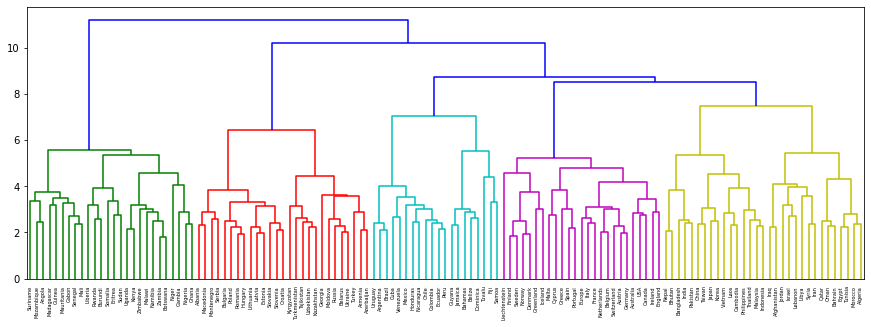

In [94]:
plt.figure(figsize=(15, 5))
Z = linkage(countries_vec, method='ward')
dendrogram(Z, labels=countries)
plt.show()

## 69. t-SNEによる可視化
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

In [95]:
from sklearn.manifold import TSNE

In [97]:
tsne = TSNE()
tsne.fit(countries_vec)

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=0)

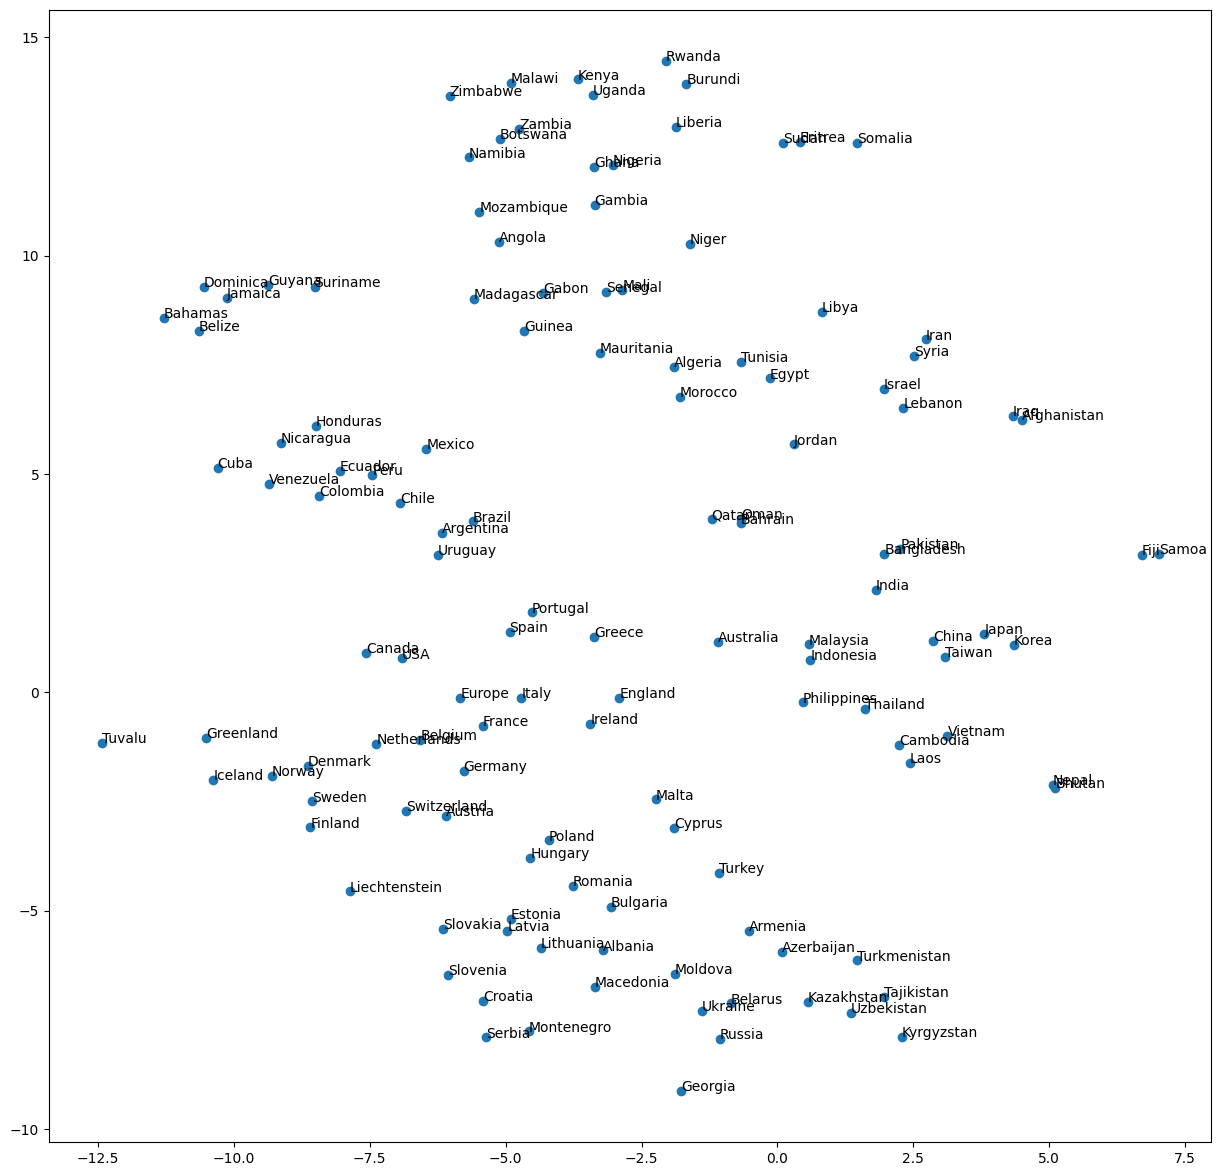

In [101]:
plt.figure(figsize=(15, 15), dpi=100)
plt.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1])
for (x, y), name in zip(tsne.embedding_, countries):
    plt.annotate(name, (x, y))
plt.show()